## record the time

In [1]:
%timeit 

6.61 ns ± 0.0411 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


## vectorized computing

In [9]:
import numpy as np
xvec = np.random.randint(5, size = (1, 5))
print(xvec)
print(1/xvec)

[[4 4 3 1 1]]
[[0.25       0.25       0.33333333 1.         1.        ]]


In [10]:
np.arange(5) / np.arange(1, 6) # elementwise computing, like R

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [18]:
print(np.power(2, 3)) # power
print(2**3)
np.exp(2)
np.log(2.7)

8
8


0.9932517730102834

## maintain precision with very small input

In [19]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


In [20]:
from scipy import special
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))


erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


## Specify output location

In [21]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [26]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)
# would have resulted in the creation of a temporary array to hold the results of 2 ** x,
# followed by a second operation copying those values into the y array.
y[::2] = 2**x 
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


## Aggregates

In [30]:
x = np.arange(1, 6)
print(np.sum(x))
np.add.reduce(x) # 1 + ... +6

15


15

## intermediate results of the computation

In [32]:
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[ 1  3  6 10 15]
[  1   2   6  24 120]


## Outer products

In [33]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Aggregates

In [35]:
l = np.random.random(100)

In [37]:
np.sum(l)

50.69138091915931

In [38]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array) # faster

70.6 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
283 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
big_array.min() # /.max() /.sum() # shorter syntax

5.709600716663488e-07

In [45]:
mat = np.arange(12).reshape((3, 4))
print(mat)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [48]:
print(mat.min(axis = 0)) # column wise
print(mat.min(axis = 1))


[0 1 2 3]
[0 4 8]


## an example

In [50]:
import pandas as pd

In [58]:
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [54]:
data.head(n = 3)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189


In [59]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

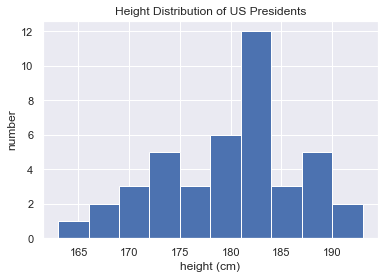

In [60]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');